Pulling the csv file from github

In [7]:
# Clone the repository
!git clone https://github.com/jazxmok/UTMStudy.git

#clone into UTMStudy
%cd UTMStudy

import pandas as pd

# Load and display the CSV file
df = pd.read_csv('Flat prices.csv')
print(df.head())


fatal: destination path 'UTMStudy' already exists and is not an empty directory.
/content/UTMStudy
     month        town flat_type block        street_name storey_range  \
0  2017-01  ANG MO KIO    2 ROOM   406  ANG MO KIO AVE 10     10 TO 12   
1  2017-01  ANG MO KIO    3 ROOM   108   ANG MO KIO AVE 4     01 TO 03   
2  2017-01  ANG MO KIO    3 ROOM   602   ANG MO KIO AVE 5     01 TO 03   
3  2017-01  ANG MO KIO    3 ROOM   465  ANG MO KIO AVE 10     04 TO 06   
4  2017-01  ANG MO KIO    3 ROOM   601   ANG MO KIO AVE 5     01 TO 03   

   floor_area_sqm      flat_model  lease_commence_date     remaining_lease  \
0            44.0        Improved                 1979  61 years 04 months   
1            67.0  New Generation                 1978  60 years 07 months   
2            67.0  New Generation                 1980  62 years 05 months   
3            68.0  New Generation                 1980   62 years 01 month   
4            67.0  New Generation                 1980  62 years 0

Performing Explarotory Data Analysis (EDA)

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#looking for the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92270 entries, 0 to 92269
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                92270 non-null  object 
 1   Town                 92270 non-null  object 
 2   Flat Type            92270 non-null  object 
 3   Block                92270 non-null  object 
 4   Street Name          92270 non-null  object 
 5   Storey Range         92270 non-null  object 
 6   Floor Area Sqm       92270 non-null  float64
 7   Flat Model           92270 non-null  object 
 8   Lease Commence Date  92270 non-null  int64  
 9   Remaining Lease      92270 non-null  object 
 10  Arrival              92270 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 7.7+ MB


In [18]:
#Check for Duplication
df.nunique()

month                    50
Town                     26
Flat Type                 7
Block                  2491
Street Name             551
Storey Range             17
Floor Area Sqm          162
Flat Model               20
Lease Commence Date      54
Remaining Lease         633
Arrival                2634
dtype: int64

In [19]:
#Missing Value Calculation
df.isnull().sum()

month                  0
Town                   0
Flat Type              0
Block                  0
Street Name            0
Storey Range           0
Floor Area Sqm         0
Flat Model             0
Lease Commence Date    0
Remaining Lease        0
Arrival                0
dtype: int64

In [35]:
# Remove S.No. column from data
df.rename(columns={"Arrival": "Resale Price"})
data = df.drop(['Block','Street Name','Flat Type','Storey Range','Flat Model','Lease Commence Date','Remaining Lease'], axis = 1)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92270 entries, 0 to 92269
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   month           92270 non-null  object 
 1   Town            92270 non-null  object 
 2   Floor Area Sqm  92270 non-null  float64
 3   Arrival         92270 non-null  float64
dtypes: float64(2), object(2)
memory usage: 2.8+ MB


,month,Town,Floor Area Sqm,Arrival
0,2017-01,ANG MO KIO,44.0,232000.0
1,2017-01,ANG MO KIO,67.0,250000.0
2,2017-01,ANG MO KIO,67.0,262000.0
3,2017-01,ANG MO KIO,68.0,265000.0
4,2017-01,ANG MO KIO,67.0,265000.0


In [40]:
#Using Statistic to more undestanding the data
df.describe().T
#From the data we can know that lease commence date is year 1994, and the mean is SGD 444,886

,count,mean,std,min,25%,50%,75%,max
Floor Area Sqm,92270.0,97.768362,24.263575,31.0,82.0,95.0,113.0,249.0
Lease Commence Date,92270.0,1994.444175,13.064066,1966.0,1984.0,1995.0,2003.0,2019.0
Arrival,92270.0,444886.900540,154824.263389,140000.0,333000.0,415000.0,520000.0,1258000.0


In [42]:
#separate Numerical and categorical variables for easy analysis
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['month', 'Town'], dtype='object')
Numerical Variables:
['Floor Area Sqm', 'Arrival']


Floor Area Sqm
Skew : 0.25


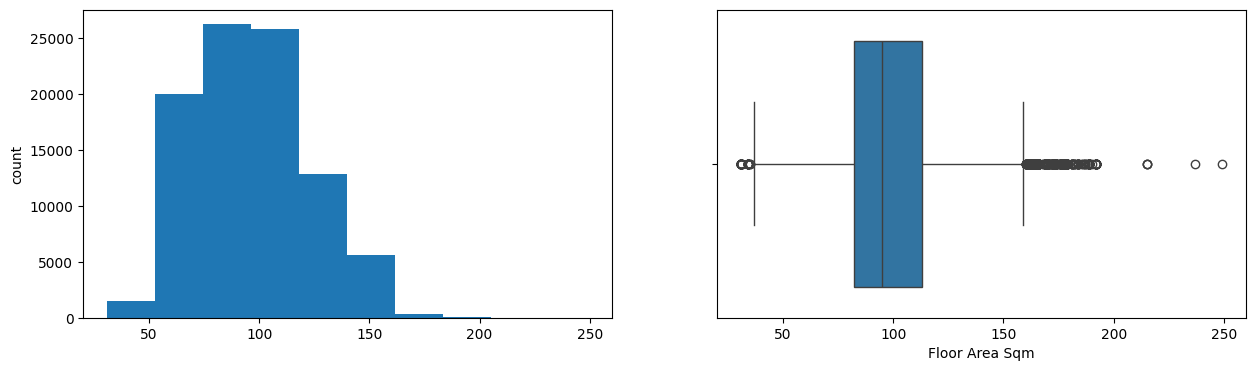

Arrival
Skew : 1.09


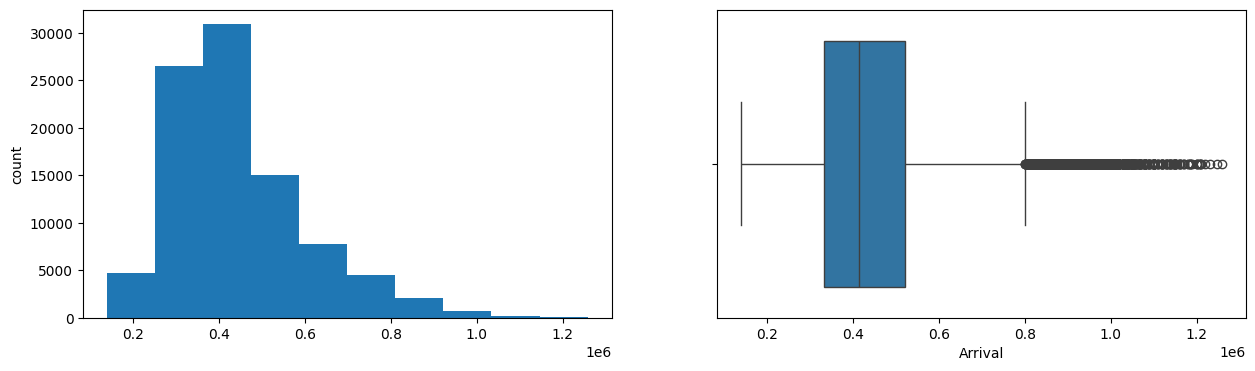

In [46]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

    #From Statistic we can know that Floor Area Sqm is slightly positively skewed
    #Most properties have smaller floor areas: The majority of properties in the dataset have floor areas closer to the lower end of the range.
#Fewer properties have very large floor areas: There are fewer properties with floor areas that are much larger than the average or typical floor area.

#From statistics we can know that A price skew of 1.09, similar to the arrival skew mentioned earlier, indicates that the distribution of prices is positively skewed. This means:
#Most properties have lower prices: The majority of properties in the dataset are likely to have prices closer to the lower end of the price range.
#Fewer properties have very high prices: There are fewer properties with prices that are much higher than the average or typical price.